<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/sign%7Bcnn%7Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 import seaborn as sb
 import tensorflow as tf
 from tensorflow import keras
 import matplotlib.pyplot as plt
 


In [2]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project__6/archive (47)/sign_mnist_train.csv')

In [3]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project__6/archive (47)/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [5]:
ytest=test['label']
xtest=test.drop('label',axis=1)
ytrain=train['label']
xtrain=train.drop('label',axis=1)

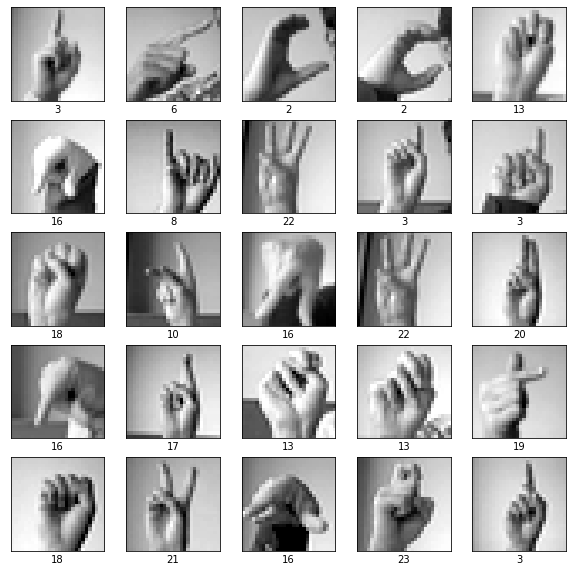

In [6]:
xtrain=xtrain.values.reshape(-1,28,28)
xtest=xtest.values.reshape(-1,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i],cmap=plt.get_cmap('gray'))
  plt.xlabel(ytrain[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of each lavel')

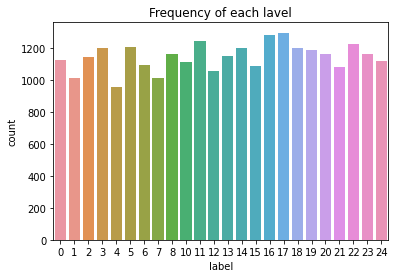

In [7]:
sb.countplot(ytrain)
plt.title("Frequency of each lavel")

In [8]:
xtrain=xtrain.reshape(-1,28,28)
xtest=xtest.reshape(-1,28,28)

In [9]:
xtrain=xtrain/255
xtest=xtest/255

In [10]:
 from sklearn.preprocessing import LabelBinarizer

In [11]:
lbz=LabelBinarizer()

In [12]:
ytrain=lbz.fit_transform(ytrain)
ytest=lbz.fit_transform(ytest)

In [13]:
from keras.models import Sequential
from keras import layers

In [14]:
model=Sequential([
                  layers.Conv2D(128,(4,4),padding="Same",activation='relu',input_shape=(28,28,1)),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(64,(4,4),padding='Same',activation='relu'),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(32,(4,4),padding='Same',activation='relu'),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(16,(4,4),padding='Same',activation='relu'),
                  layers.MaxPooling2D((2,2)),
                  layers.Flatten(),
                  layers.Dense(1000,activation='relu'),
                  layers.Dropout((0.5)),
                  layers.Dense(24,activation='softmax'),


])



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       2176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          32800     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [16]:
model.compile(
    optimizer='adam',loss=keras.losses.CategoricalCrossentropy(),metrics=['acc']
)

In [17]:
history=model.fit(xtrain,ytrain,batch_size=128,verbose=2,epochs=25,validation_data=(xtest,ytest))

Epoch 1/25
215/215 - 19s - loss: 2.0186 - acc: 0.3513 - val_loss: 0.9290 - val_acc: 0.6652 - 19s/epoch - 90ms/step
Epoch 2/25
215/215 - 6s - loss: 0.4063 - acc: 0.8578 - val_loss: 0.4915 - val_acc: 0.8178 - 6s/epoch - 28ms/step
Epoch 3/25
215/215 - 6s - loss: 0.0919 - acc: 0.9721 - val_loss: 0.3492 - val_acc: 0.8858 - 6s/epoch - 28ms/step
Epoch 4/25
215/215 - 6s - loss: 0.0308 - acc: 0.9920 - val_loss: 0.3557 - val_acc: 0.9031 - 6s/epoch - 28ms/step
Epoch 5/25
215/215 - 6s - loss: 0.0162 - acc: 0.9959 - val_loss: 0.3309 - val_acc: 0.9152 - 6s/epoch - 28ms/step
Epoch 6/25
215/215 - 6s - loss: 0.0173 - acc: 0.9951 - val_loss: 0.2985 - val_acc: 0.9162 - 6s/epoch - 28ms/step
Epoch 7/25
215/215 - 6s - loss: 0.0074 - acc: 0.9983 - val_loss: 0.3127 - val_acc: 0.9233 - 6s/epoch - 28ms/step
Epoch 8/25
215/215 - 6s - loss: 0.0215 - acc: 0.9928 - val_loss: 0.3665 - val_acc: 0.9032 - 6s/epoch - 28ms/step
Epoch 9/25
215/215 - 6s - loss: 0.0079 - acc: 0.9975 - val_loss: 0.3472 - val_acc: 0.9112 - 6s

In [18]:
model.evaluate(xtest,ytest)

225/225 [==============================] - 2s 8ms/step - loss: 0.3540 - acc: 0.9373


[0.3539927303791046, 0.9372559785842896]

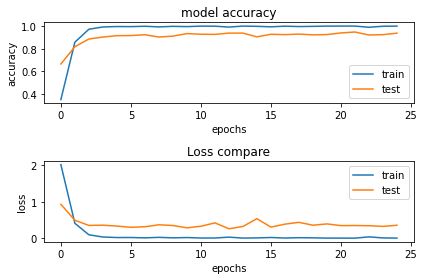

In [22]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss compare')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()